## Gaussian Process Classification (GPC) for MNIST digits classification

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from GPy.kern import RBF
from GPy.models import GPClassification
from GPy.inference.latent_function_inference.expectation_propagation import EP
from GPy.inference.latent_function_inference.laplace import Laplace
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

 /Users/dangchan/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
 /Users/dangchan/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


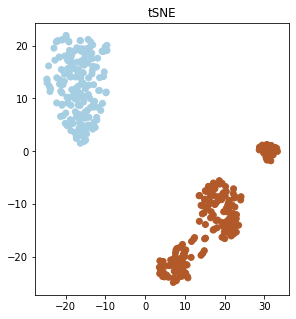

In [51]:
# MNIST data

from sklearn.datasets import load_digits

digits = load_digits(n_class=2) # binary classification

X = digits.data
Y = digits.target[:,None]


# tSNE for visulization
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2, random_state=0)
X_tSNE = tSNE.fit_transform(X)

# Plot

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_tSNE[:,0], X_tSNE[:,1], c=Y[:,0], cmap=plt.cm.Paired)
plt.title('tSNE')
plt.show()

In [52]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

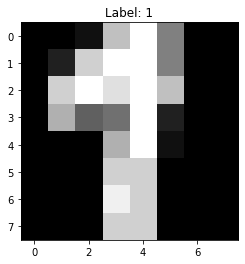

In [53]:
# sample image

plt.imshow(X_train[0].reshape(8,8), cmap='gray')
plt.title('Label: {}'.format(Y_train[0,0]))
plt.show()

In [66]:
# GPC

kernel = RBF(input_dim = X.shape[1])
laplace = Laplace()
ep = EP(ep_mode='nested')
gpc_ep = GPClassification(X, Y, kernel=kernel, inference_method=ep)
gpc_la = GPClassification(X, Y, kernel=kernel, inference_method=laplace)

gpc_ep.optimize(messages=True)
gpc_la.optimize(messages=True)

nothing to optimize


In [70]:
gpc_la.predict(X)[0]

array([[0.49976883],
       [0.50023117],
       [0.49976883],
       [0.50023117],
       [0.49976883],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.50023117],
       [0.50023117],
       [0.50023117],
       [0.50023117],
       [0.49976883],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.49976883],
       [0.50023117],
       [0.49976883],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.50023117],
       [0.49976883],
       [0.49976883],
       [0.49976883],
       [0.50023117],
       [0.50023117],
       [0.50023117],
       [0.500

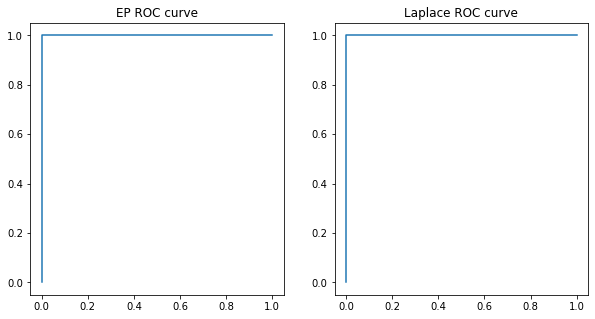

In [63]:
# ROC curve

fpr_ep, tpr_ep, _ = roc_curve(Y_test, gpc_ep.predict(X_test)[0])
fpr_la, tpr_la, _ = roc_curve(Y_test, gpc_la.predict(X_test)[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(fpr_ep, tpr_ep)
plt.title('EP ROC curve')
plt.subplot(122)
plt.plot(fpr_la, tpr_la)
plt.title('Laplace ROC curve')
plt.show()

In [48]:
# confusion matrix
from sklearn.metrics import confusion_matrix

Y_pred_ep = gpc_ep.predict(X_test)[0]
Y_pred_la = gpc_la.predict(X_test)[0]

cm_ep = confusion_matrix(Y_test, Y_pred_ep)
cm_la = confusion_matrix(Y_test, Y_pred_la)

print('EP confusion matrix')
print(cm_ep)
print('Laplace confusion matrix')
print(cm_la)

ValueError: Classification metrics can't handle a mix of binary and continuous targets